<a href="https://colab.research.google.com/github/fridahcheboi/Ensembling/blob/main/SearchObjectsInVideoFootageA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install fuzzywuzzy

This object detecting algorithm is used to monitor traffic through identifying objects of cars, bicycles and people on the road.



In [3]:
# Started by importing all required libraries
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
import cv2 # handle video processing
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np # handle numerical matrices

from concurrent.futures import ProcessPoolExecutor
from fuzzywuzzy import process
import tempfile

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# Load the pre-trained google InceptionV3 deep learning model
model = InceptionV3(weights='imagenet')

96112376/96112376 [==============================] - 0s 0us/step


In [5]:
# this function will allow users to upload videos
def upload_video():
    uploaded = files.upload()
    filename = next(iter(uploaded)) # get file name
    return filename

In [6]:
# calling the above function
print("Please upload a traffic video file here:")
video_path = upload_video()

Please upload a traffic video file here:


Saving traffic.mp4 to traffic.mp4


In [7]:
# here we extract frames from the video, at interval of every other 15 frames.
# This will increase the processing speed. and lower time taken
def extract_frame(args):
    video_path, frame_number = args
    video = cv2.VideoCapture(video_path)
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = video.read()
    video.release()
    if ret:
        return cv2.resize(frame, (299, 299))
    return None

def extract_frames(video_path, frame_interval=30):
    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    video.release()

    frame_numbers = range(0, total_frames, frame_interval)
    args = [(video_path, fn) for fn in frame_numbers]

    # Use ProcessPoolExecutor to parallelize frame extraction
    with ProcessPoolExecutor() as executor:
        frames = list(executor.map(extract_frame, args))

    return [f for f in frames if f is not None]

In [8]:
print("In process: Extraction of frames from the video...")
frames = extract_frames(video_path)
print(f"Extracted {len(frames)} frames.")

In process: Extraction of frames from the video...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Extracted 21 frames.


In [9]:
# this function detects given objects in the frames
def detect_objects(frame):
    # Preprocess the frame
    img = cv2.resize(frame, (299, 299))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Predict
    predictions = model.predict(img)
    decoded_predictions = decode_predictions(predictions, top=5)[0]

    return decoded_predictions


In [10]:
# this method calls the above function repeatedly until all frames have been analysed
def search_object(frames, query):
    found_frames = []
    for i, frame in enumerate(frames):
        predictions = detect_objects(frame)
        for _, label, confidence in predictions:
            if query.lower() in label.lower():
                found_frames.append((i, frame, confidence))
    return found_frames

Enter the roadway object to search for (or 'quit' to exit): car
Searching for 'car' in the video...
1/1 [==============================] - 0s 257ms/step
Found 'car' in 8 frames:
Frame 13: Confidence 0.04


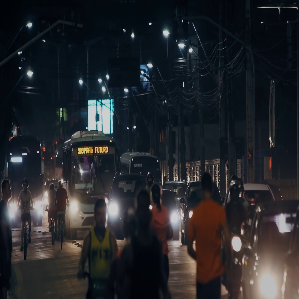

Frame 14: Confidence 0.13


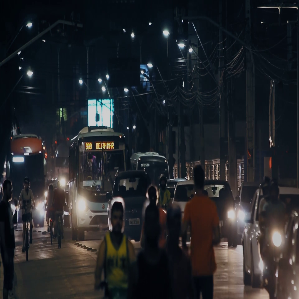

Frame 15: Confidence 0.09


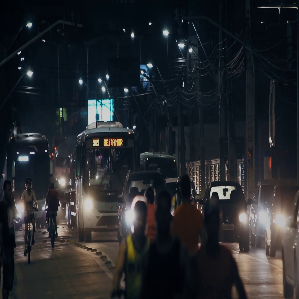

Frame 16: Confidence 0.52


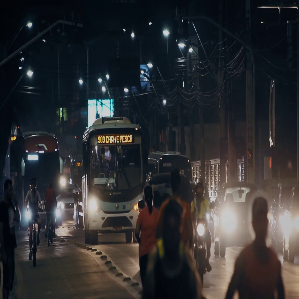

Frame 17: Confidence 0.04


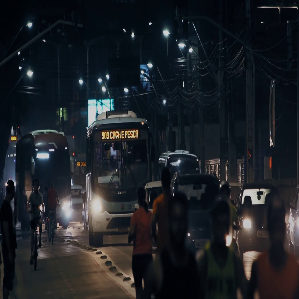

Frame 18: Confidence 0.28


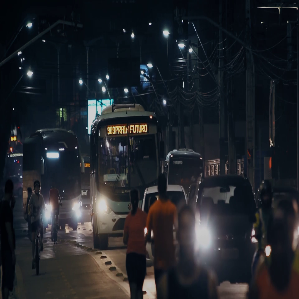

Frame 19: Confidence 0.79


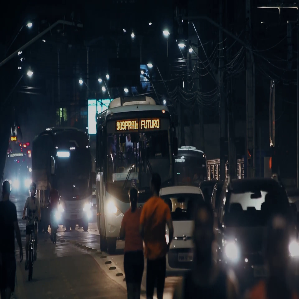

Frame 20: Confidence 0.69


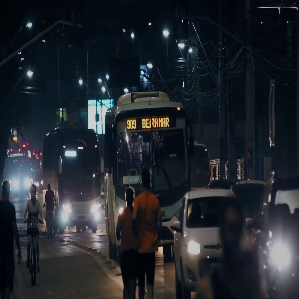

Enter the roadway object to search for (or 'quit' to exit): people
Searching for 'people' in the video...
1/1 [==============================] - 0s 250ms/step
The given roadway object doesn't exist!!!
Enter the roadway object to search for (or 'quit' to exit): bus
Searching for 'bus' in the video...
1/1 [==============================] - 0s 399ms/step
Found 'bus' in 6 frames:
Frame 16: Confidence 0.29


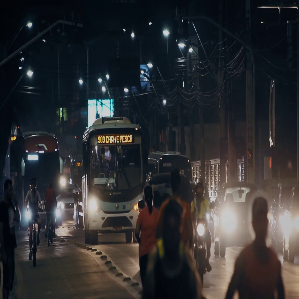

Frame 16: Confidence 0.02


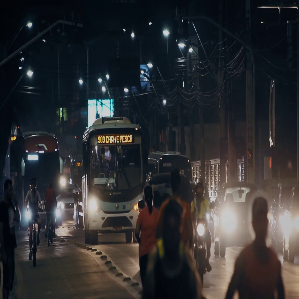

Frame 18: Confidence 0.16


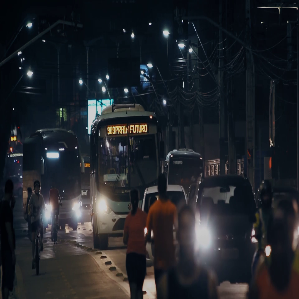

Frame 19: Confidence 0.03


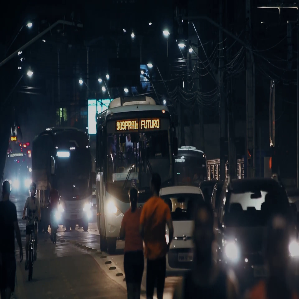

Frame 20: Confidence 0.27


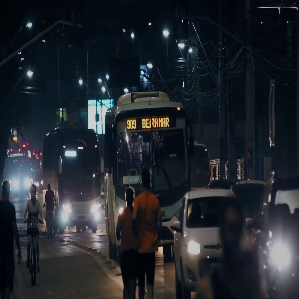

Frame 20: Confidence 0.01


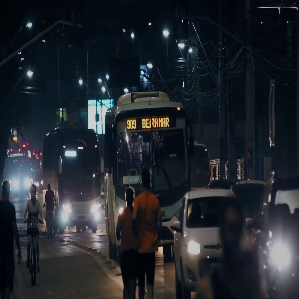

Enter the roadway object to search for (or 'quit' to exit): bike
Searching for 'bike' in the video...
1/1 [==============================] - 0s 235ms/step
The given roadway object doesn't exist!!!
Enter the roadway object to search for (or 'quit' to exit): bicycle
Searching for 'bicycle' in the video...
1/1 [==============================] - 0s 237ms/step
The given roadway object doesn't exist!!!
Enter the roadway object to search for (or 'quit' to exit): light
Searching for 'light' in the video...
1/1 [==============================] - 0s 252ms/step
Found 'light' in 28 frames:
Frame 0: Confidence 0.25


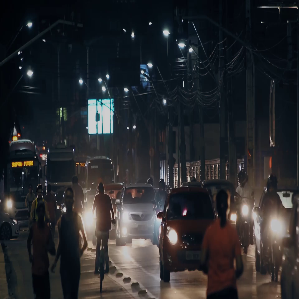

Frame 0: Confidence 0.04


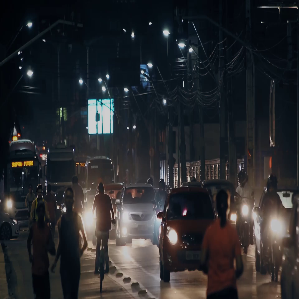

Frame 1: Confidence 0.12


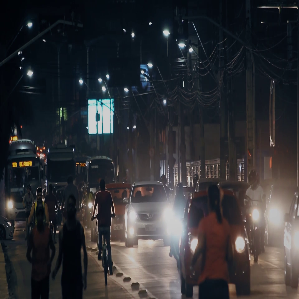

Frame 1: Confidence 0.03


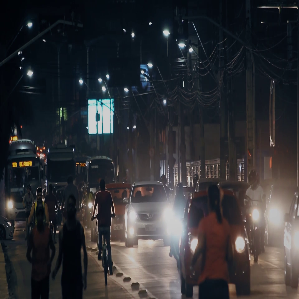

Frame 2: Confidence 0.10


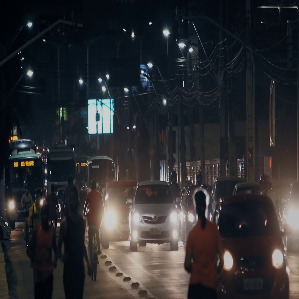

Frame 3: Confidence 0.12


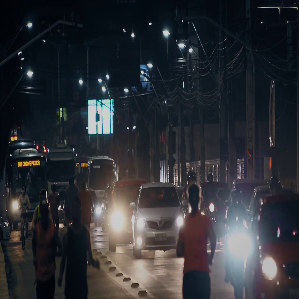

Frame 4: Confidence 0.28


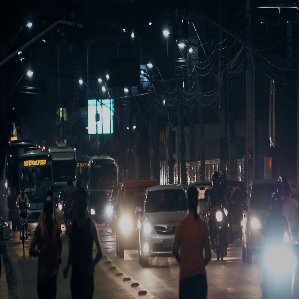

Frame 5: Confidence 0.04


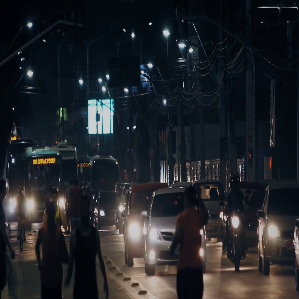

Frame 6: Confidence 0.12


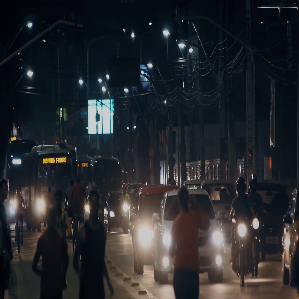

Frame 7: Confidence 0.33


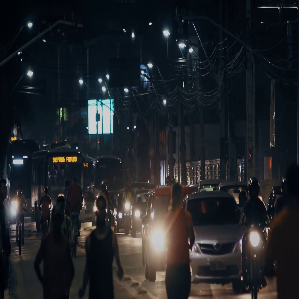

Frame 7: Confidence 0.12


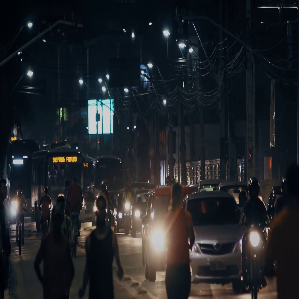

Frame 8: Confidence 0.11


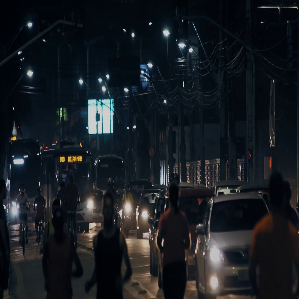

Frame 8: Confidence 0.07


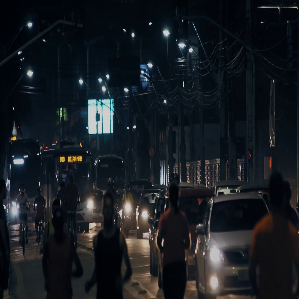

Frame 9: Confidence 0.37


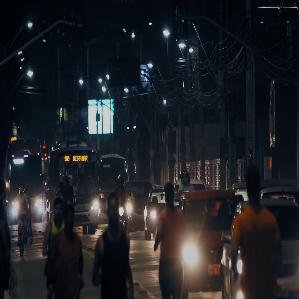

Frame 9: Confidence 0.05


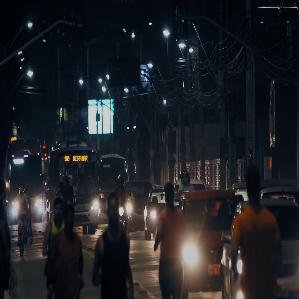

Frame 10: Confidence 0.18


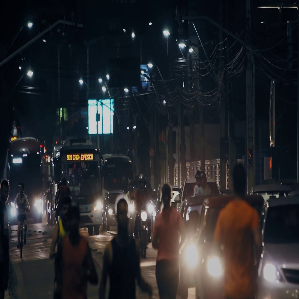

Frame 11: Confidence 0.16


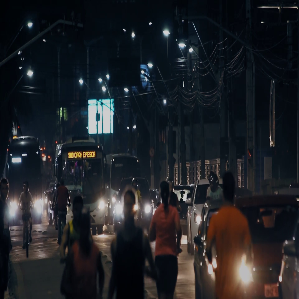

Frame 11: Confidence 0.15


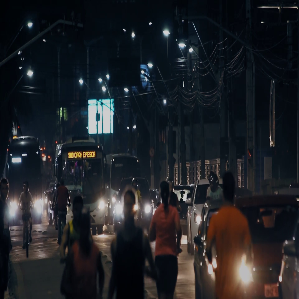

Frame 12: Confidence 0.11


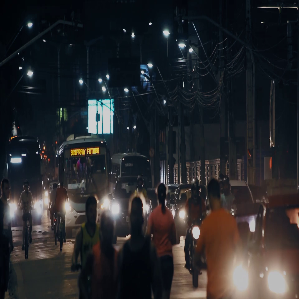

Frame 12: Confidence 0.09


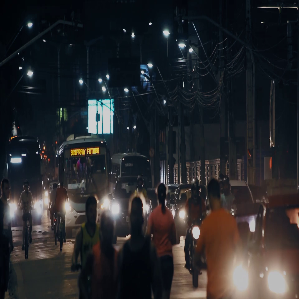

Frame 13: Confidence 0.32


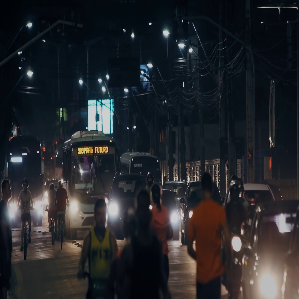

Frame 13: Confidence 0.15


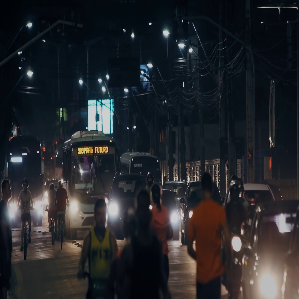

Frame 14: Confidence 0.26


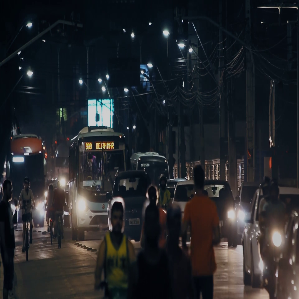

Frame 15: Confidence 0.22


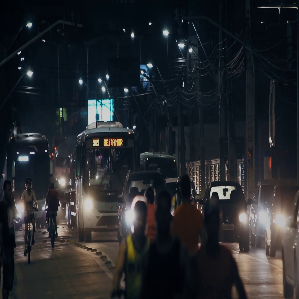

Frame 17: Confidence 0.11


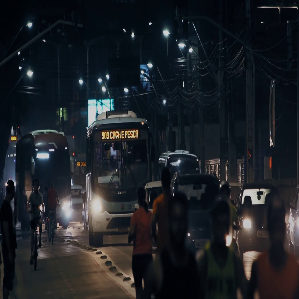

Frame 18: Confidence 0.07


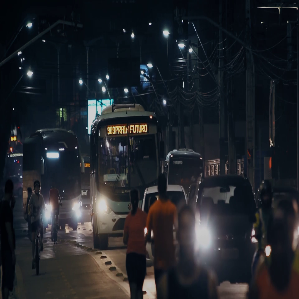

Frame 19: Confidence 0.02


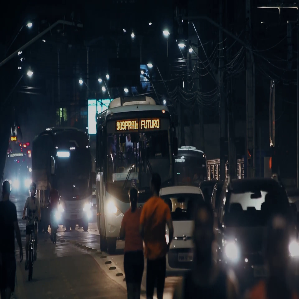

Frame 20: Confidence 0.00


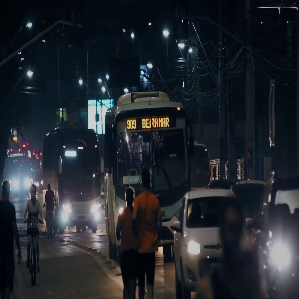

Enter the roadway object to search for (or 'quit' to exit): quit


In [11]:
# He the user passes in their input and output of whether the object is found is given.
while True:
    query = input("Enter the roadway object to search for (or 'quit' to exit): ")
    if query.lower() == 'quit':
        break

    print(f"Searching for '{query}' in the video...")
    found_frames = search_object(frames, query)

    if found_frames:
        print(f"Found '{query}' in {len(found_frames)} frames:")
        for i, frame, confidence in found_frames:
            print(f"Frame {i}: Confidence {confidence:.2f}")
            cv2_imshow(frame)
    else:
        print("The given roadway object doesn't exist!!!")